In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [52]:
file_path = "asia_grill_2024_prerpo.xlsx"
df = pd.read_excel(file_path, parse_dates=["Відкритий", "Закритий"])
df["Duration"] = (df["Закритий"] - df["Відкритий"]).dt.total_seconds() / 60
df = df[df["Оплачено"] > 0]
df = df.drop_duplicates(subset=["#"])
df.columns = df.columns.str.strip()
df

,#,Стіл,Офіціант,Відкритий,Закритий,num_guests,Сума чека,Оплачено,Знижка в чеку,Прибуток,...,К-сть товарів,Сума товарів,Знижки на товари,Загальна ціна товарів,Ранок,Обід,Вечір,День тижня,weekend,Duration
0,10651,—,Максим Чернецький,2024-12-31 17:52:35,2024-12-31 17:55:16,1,1800.0,1440.0,360.0,747.54,...,1.0,1740.0,348.0,1392.0,0,1,0,Tuesday,0,2.683333
2,10650,—,Максим Чернецький,2024-12-31 17:52:11,2024-12-31 17:52:27,1,1740.0,1392.0,348.0,741.01,...,1.0,1740.0,348.0,1392.0,0,1,0,Tuesday,0,0.266667
3,10649,—,Максим Чернецький,2024-12-31 17:49:10,2024-12-31 17:50:21,1,1740.0,1392.0,348.0,737.97,...,1.0,1740.0,348.0,1392.0,0,1,0,Tuesday,0,1.183333
4,10648,—,Максим Чернецький,2024-12-31 17:40:36,2024-12-31 18:04:28,1,991.0,991.0,0.0,645.24,...,1.0,920.0,0.0,920.0,0,1,0,Tuesday,0,23.866667
6,10647,—,Максим Чернецький,2024-12-31 17:28:29,2024-12-31 18:00:55,0,528.0,475.2,52.8,258.54,...,1.0,172.0,17.2,154.8,0,1,0,Tuesday,0,32.433333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25177,3838,—,Аліна,2024-01-01 19:22:54,2024-01-01 19:59:50,1,847.0,847.0,0.0,527.80,...,1.0,157.0,0.0,157.0,0,0,1,Monday,0,36.933333
25182,3837,—,Аліна,2024-01-01 15:37:24,2024-01-01 15:50:51,1,564.0,507.6,56.4,322.33,...,2.0,564.0,56.4,507.6,0,1,0,Monday,0,13.450000
25183,3836,—,Аліна,2024-01-01 13:57:14,2024-01-01 14:21:44,1,292.0,292.0,0.0,199.75,...,1.0,159.0,0.0,159.0,1,0,0,Monday,0,24.500000
25185,3835,д7 (Основний зал),Даша Батюк,2024-01-01 13:45:45,2024-01-01 14:48:46,1,585.0,585.0,0.0,475.94,...,1.0,50.0,0.0,50.0,1,0,0,Monday,0,63.016667


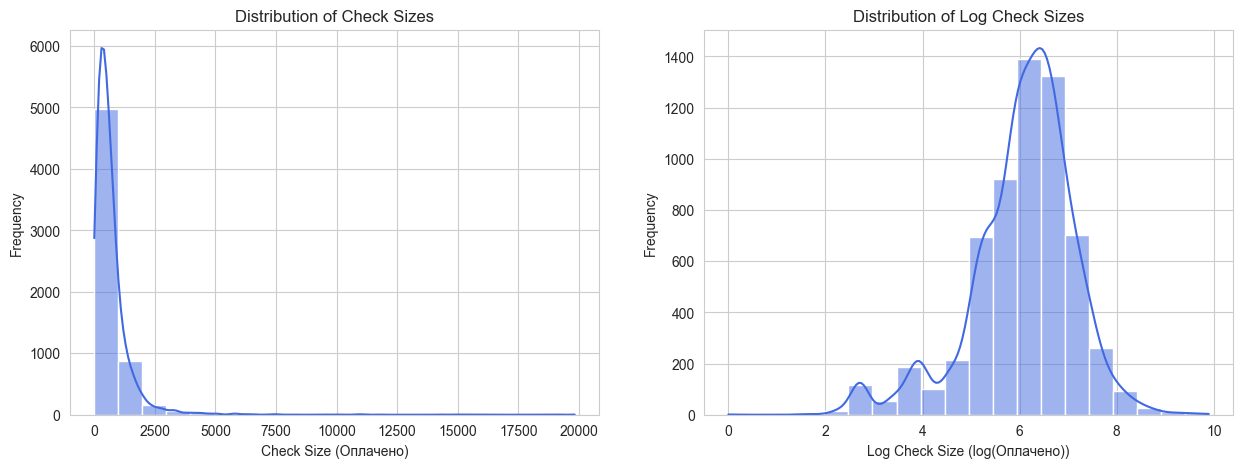

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df["Оплачено"], bins=20, kde=True, color="royalblue", ax=axes[0])
axes[0].set_xlabel("Check Size (Оплачено)")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Distribution of Check Sizes")
axes[0].grid(True)

log_check = np.log(df["Оплачено"])
sns.histplot(log_check, bins=20, kde=True, color="royalblue", ax=axes[1])
axes[1].set_xlabel("Log Check Size (log(Оплачено))")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Distribution of Log Check Sizes")
axes[1].grid(True)

plt.show()

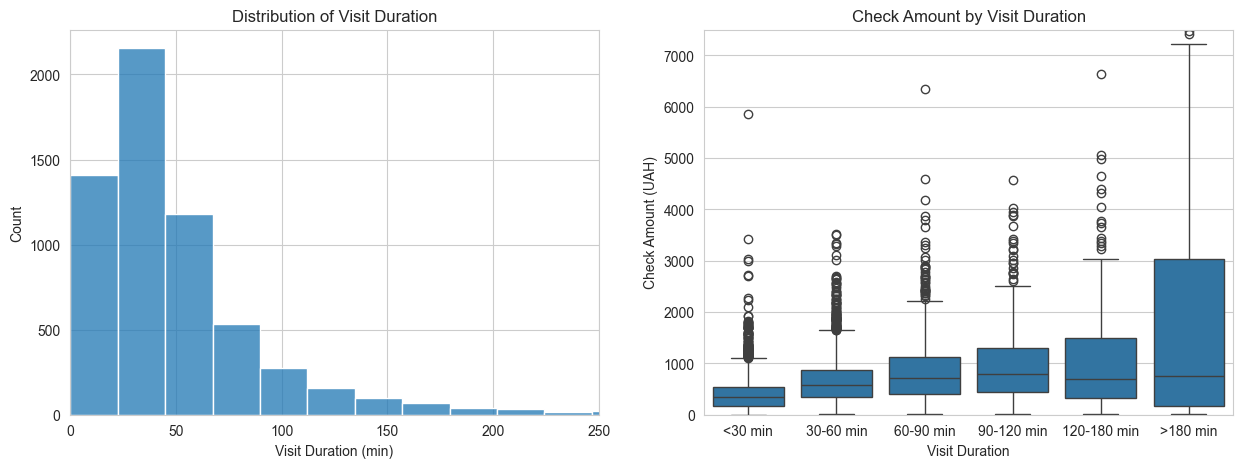

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df["Duration"], bins=30, ax=axes[0])
axes[0].set_xlim(0, 250)
axes[0].set_xlabel("Visit Duration (min)")
axes[0].set_title("Distribution of Visit Duration")

df["Duration Bins"] = pd.cut(df["Duration"], bins=[0, 30, 60, 90, 120, 180, df["Duration"].max()], labels=["<30 min", "30-60 min", "60-90 min", "90-120 min", "120-180 min", ">180 min"])
sns.boxplot(data=df, x="Duration Bins", y="Сума чека", ax=axes[1])
axes[1].set_title("Check Amount by Visit Duration")
axes[1].set_xlabel("Visit Duration")
axes[1].set_ylim(0, 7500)
axes[1].set_ylabel("Check Amount (UAH)")

plt.show()

Text(0.5, 1.0, 'Check Amount by Number of Guests')

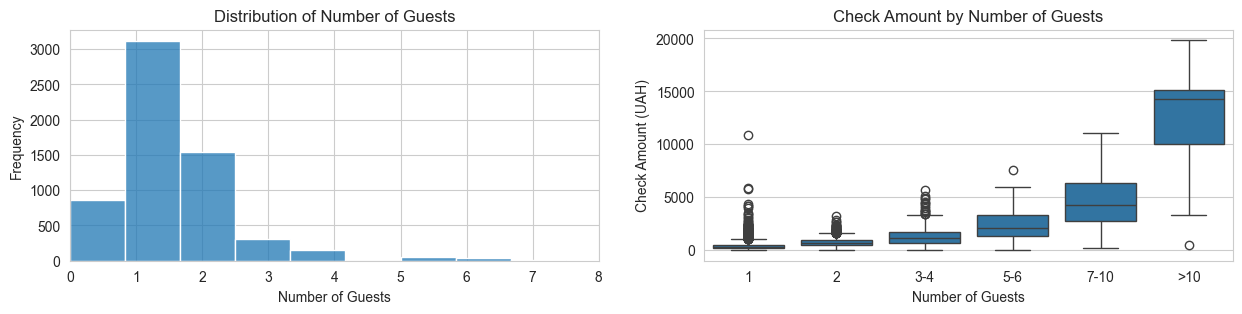

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))

sns.histplot(df["num_guests"], bins=30, ax=axes[0])
axes[0].set_xlabel("Number of Guests")
axes[0].set_ylabel("Frequency")
axes[0].set_xlim(0, 8)
axes[0].set_title("Distribution of Number of Guests")

df["Guests Bins"] = pd.cut(df["num_guests"], bins=[0, 1, 2, 4, 6, 10, df["num_guests"].max()], labels=["1", "2", "3-4", "5-6", "7-10", ">10"])
sns.boxplot(data=df, x="Guests Bins", y="Оплачено", ax=axes[1])
axes[1].set_xlabel("Number of Guests")
axes[1].set_ylabel("Check Amount (UAH)")
axes[1].set_title("Check Amount by Number of Guests")
# axes[1].set_ylim(0, 7500)

Text(0, 0.5, 'Check Amount (UAH)')

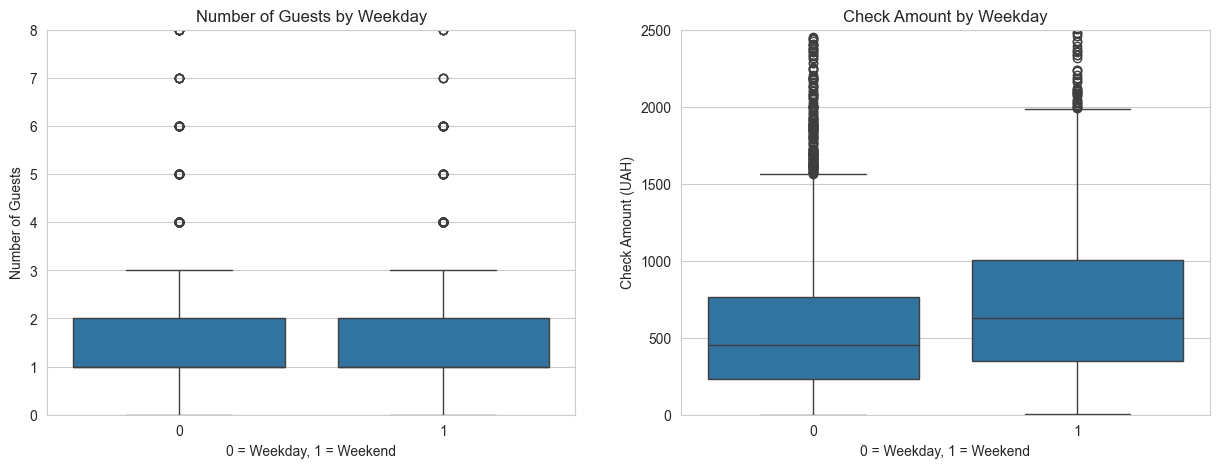

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=df, x="weekend", y="num_guests", ax=axes[0])
axes[0].set_title("Number of Guests by Weekday")
axes[0].set_xlabel("0 = Weekday, 1 = Weekend")
axes[0].set_ylim(0, 8)
axes[0].set_ylabel("Number of Guests")

sns.boxplot(data=df, x="weekend", y="Оплачено", ax=axes[1])
axes[1].set_title("Check Amount by Weekday")
axes[1].set_xlabel("0 = Weekday, 1 = Weekend")
axes[1].set_ylim(0, 2500)
axes[1].set_ylabel("Check Amount (UAH)")

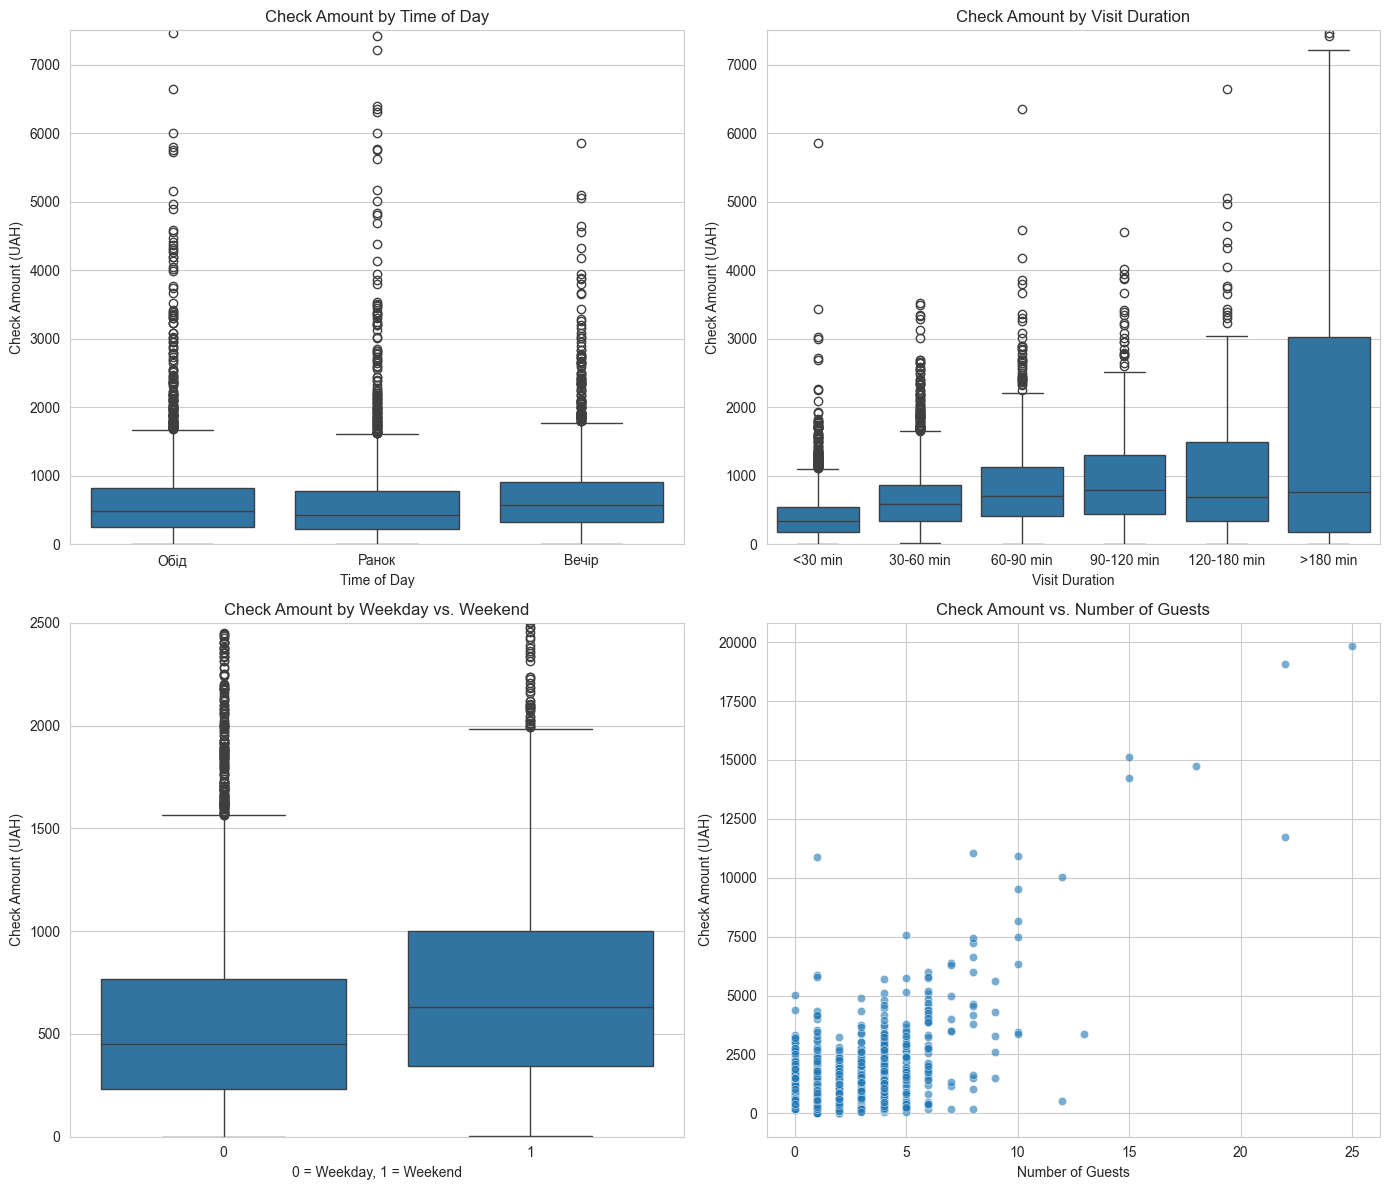

In [ ]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

sns.boxplot(data=df, x=df[["Ранок", "Обід", "Вечір"]].idxmax(axis=1), y="Оплачено", ax=axes[0, 0])
axes[0, 0].set_title("Check Amount by Time of Day")
axes[0, 0].set_xlabel("Time of Day")
axes[0, 0].set_ylim(0, 7500)
axes[0, 0].set_ylabel("Check Amount (UAH)")

df["Duration Bins"] = pd.cut(df["Duration"], bins=[0, 30, 60, 90, 120, 180, df["Duration"].max()], labels=["<30 min", "30-60 min", "60-90 min", "90-120 min", "120-180 min", ">180 min"])
sns.boxplot(data=df, x="Duration Bins", y="Сума чека", ax=axes[0, 1])
axes[0, 1].set_title("Check Amount by Visit Duration")
axes[0, 1].set_xlabel("Visit Duration")
axes[0, 1].set_ylim(0, 7500)
axes[0, 1].set_ylabel("Check Amount (UAH)")

sns.boxplot(data=df, x="weekend", y="Оплачено", ax=axes[1, 0])
axes[1, 0].set_title("Check Amount by Weekday vs. Weekend")
axes[1, 0].set_xlabel("0 = Weekday, 1 = Weekend")
axes[1, 0].set_ylim(0, 2500)
axes[1, 0].set_ylabel("Check Amount (UAH)")

sns.scatterplot(data=df, x="num_guests", y="Оплачено", alpha=0.6, ax=axes[1, 1])
axes[1, 1].set_title("Check Amount vs. Number of Guests")
axes[1, 1].set_xlabel("Number of Guests")
axes[1, 1].set_ylabel("Check Amount (UAH)")

plt.tight_layout()
plt.show()

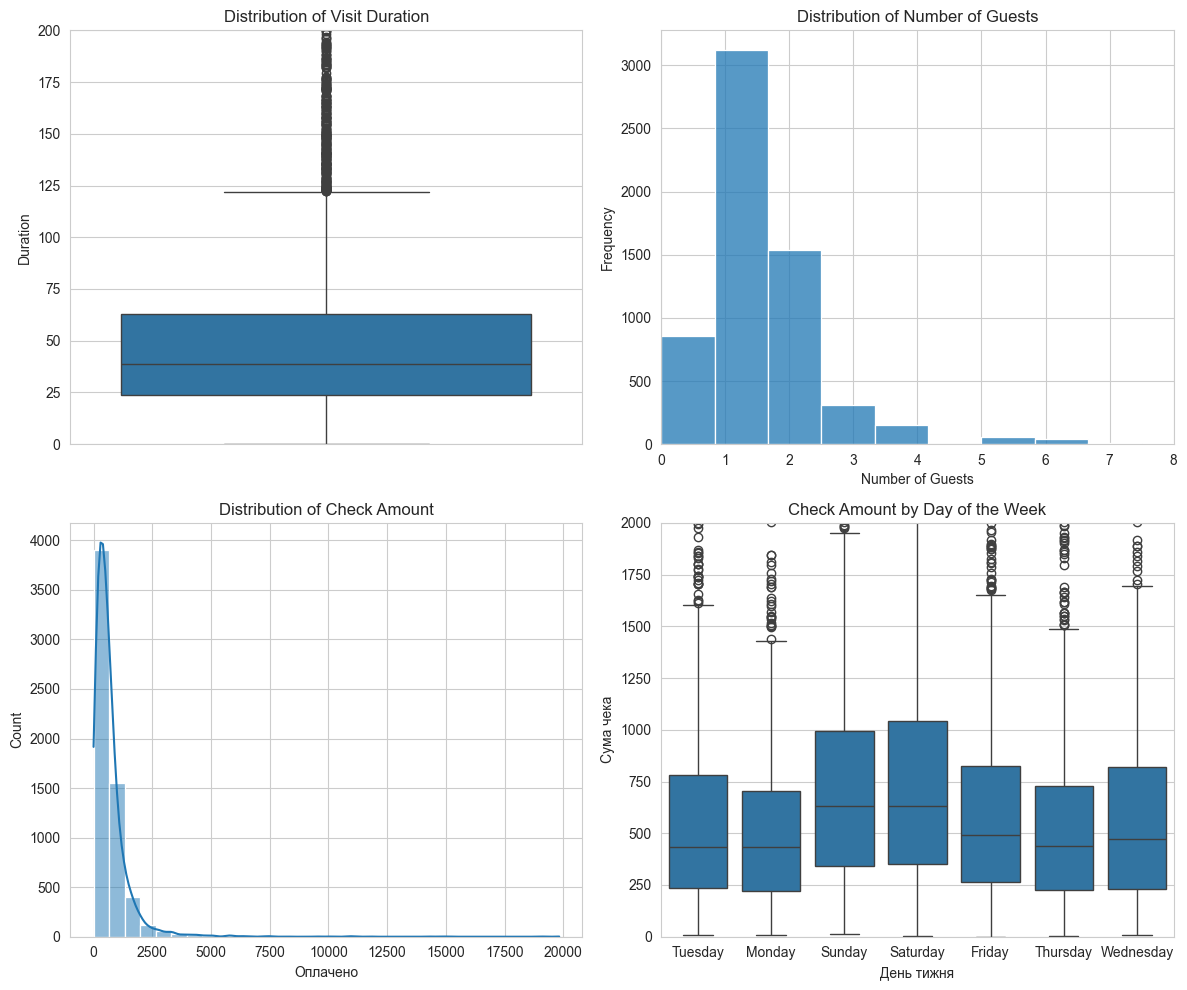

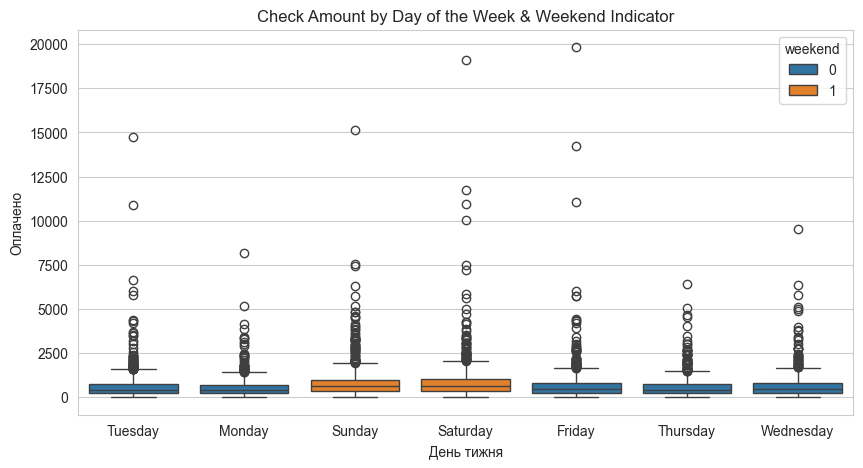

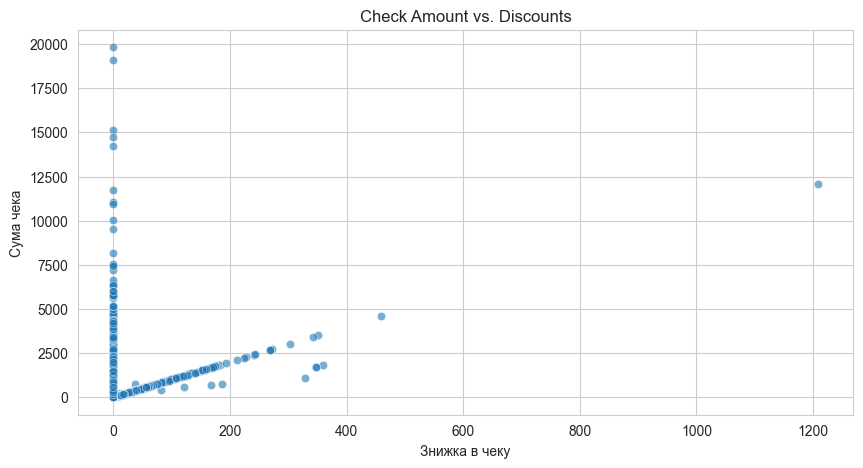

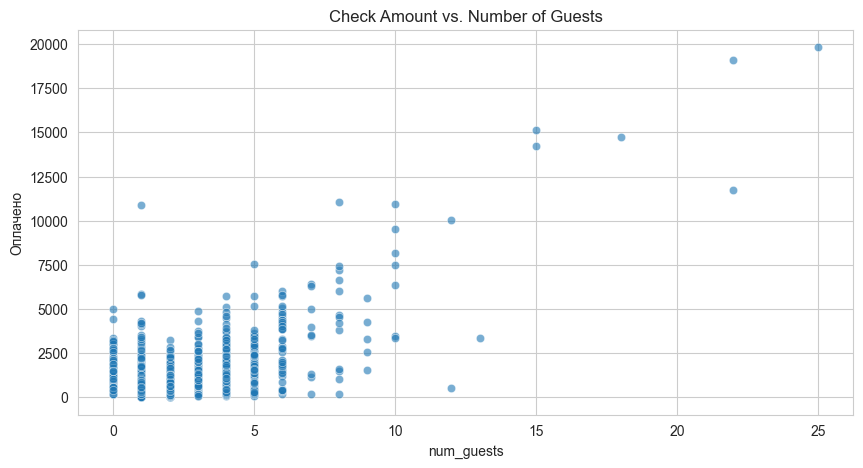

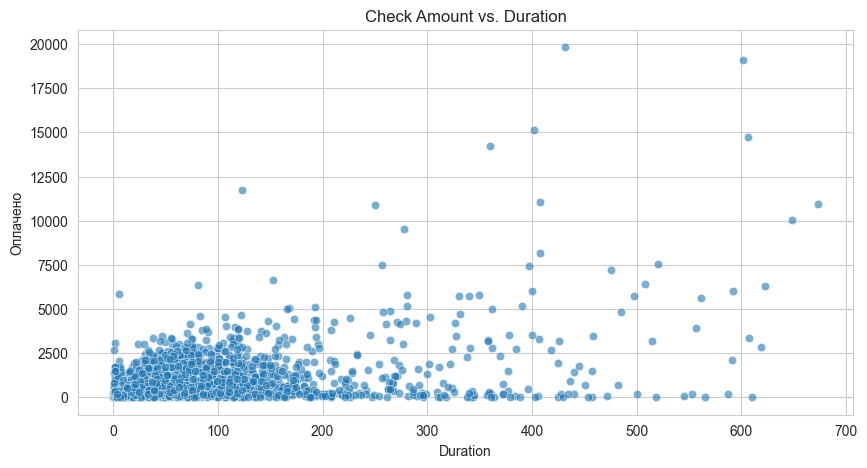

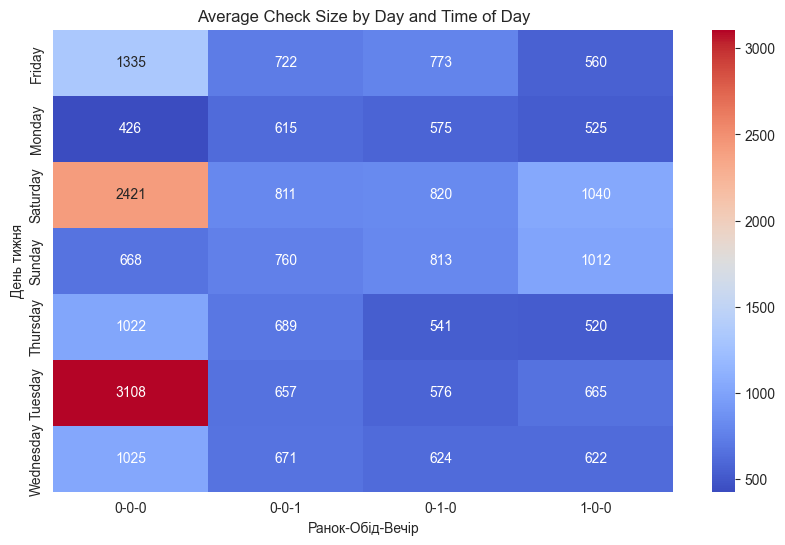

In [ ]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(df["Duration"], ax=axes[0, 0])
axes[0, 0].set_ylim(0, 200)
axes[0, 0].set_title("Distribution of Visit Duration")

sns.histplot(df["num_guests"], bins=30, ax=axes[0, 1])
axes[0, 1].set_xlabel("Number of Guests")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].set_xlim(0, 8)
axes[0, 1].set_title("Distribution of Number of Guests")

sns.histplot(df["Оплачено"], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Check Amount")

sns.boxplot(x=df["День тижня"], y=df["Сума чека"], ax=axes[1, 1])
plt.ylim(0, 2000)
axes[1, 1].set_title("Check Amount by Day of the Week")

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="День тижня", y="Оплачено", hue="weekend")
plt.title("Check Amount by Day of the Week & Weekend Indicator")
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="Знижка в чеку", y="Сума чека", alpha=0.6)
plt.title("Check Amount vs. Discounts")
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="num_guests", y="Оплачено", alpha=0.6)
plt.title("Check Amount vs. Number of Guests")
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="Duration", y="Оплачено", alpha=0.6)
plt.title("Check Amount vs. Duration")
plt.show()

pivot_table = df.pivot_table(index="День тижня", columns=["Ранок", "Обід", "Вечір"], values="Оплачено", aggfunc="mean")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Average Check Size by Day and Time of Day")
plt.show()